In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [3]:
%run '/content/pandas_missing_extension.ipynb'

In [16]:
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_df.missing.number_missing()

0

# GENERAMOS VALORES NULOS PORQUE EL DATASET NO LOS TIENE

In [17]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0,np.nan)

In [18]:
diabetes_df.missing.number_missing()

652

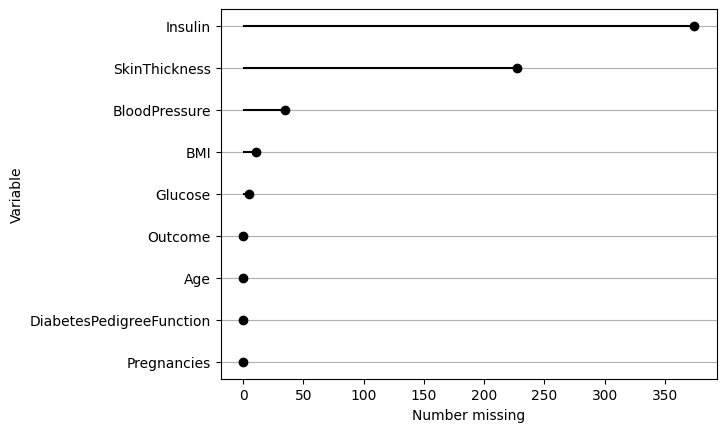

In [19]:
diabetes_df.missing.missing_variable_plot()

# TIPOS DE DATOS FALTANTES

## MISSING COMPLETELY AT RANDOM(MCAR)

<Axes: >

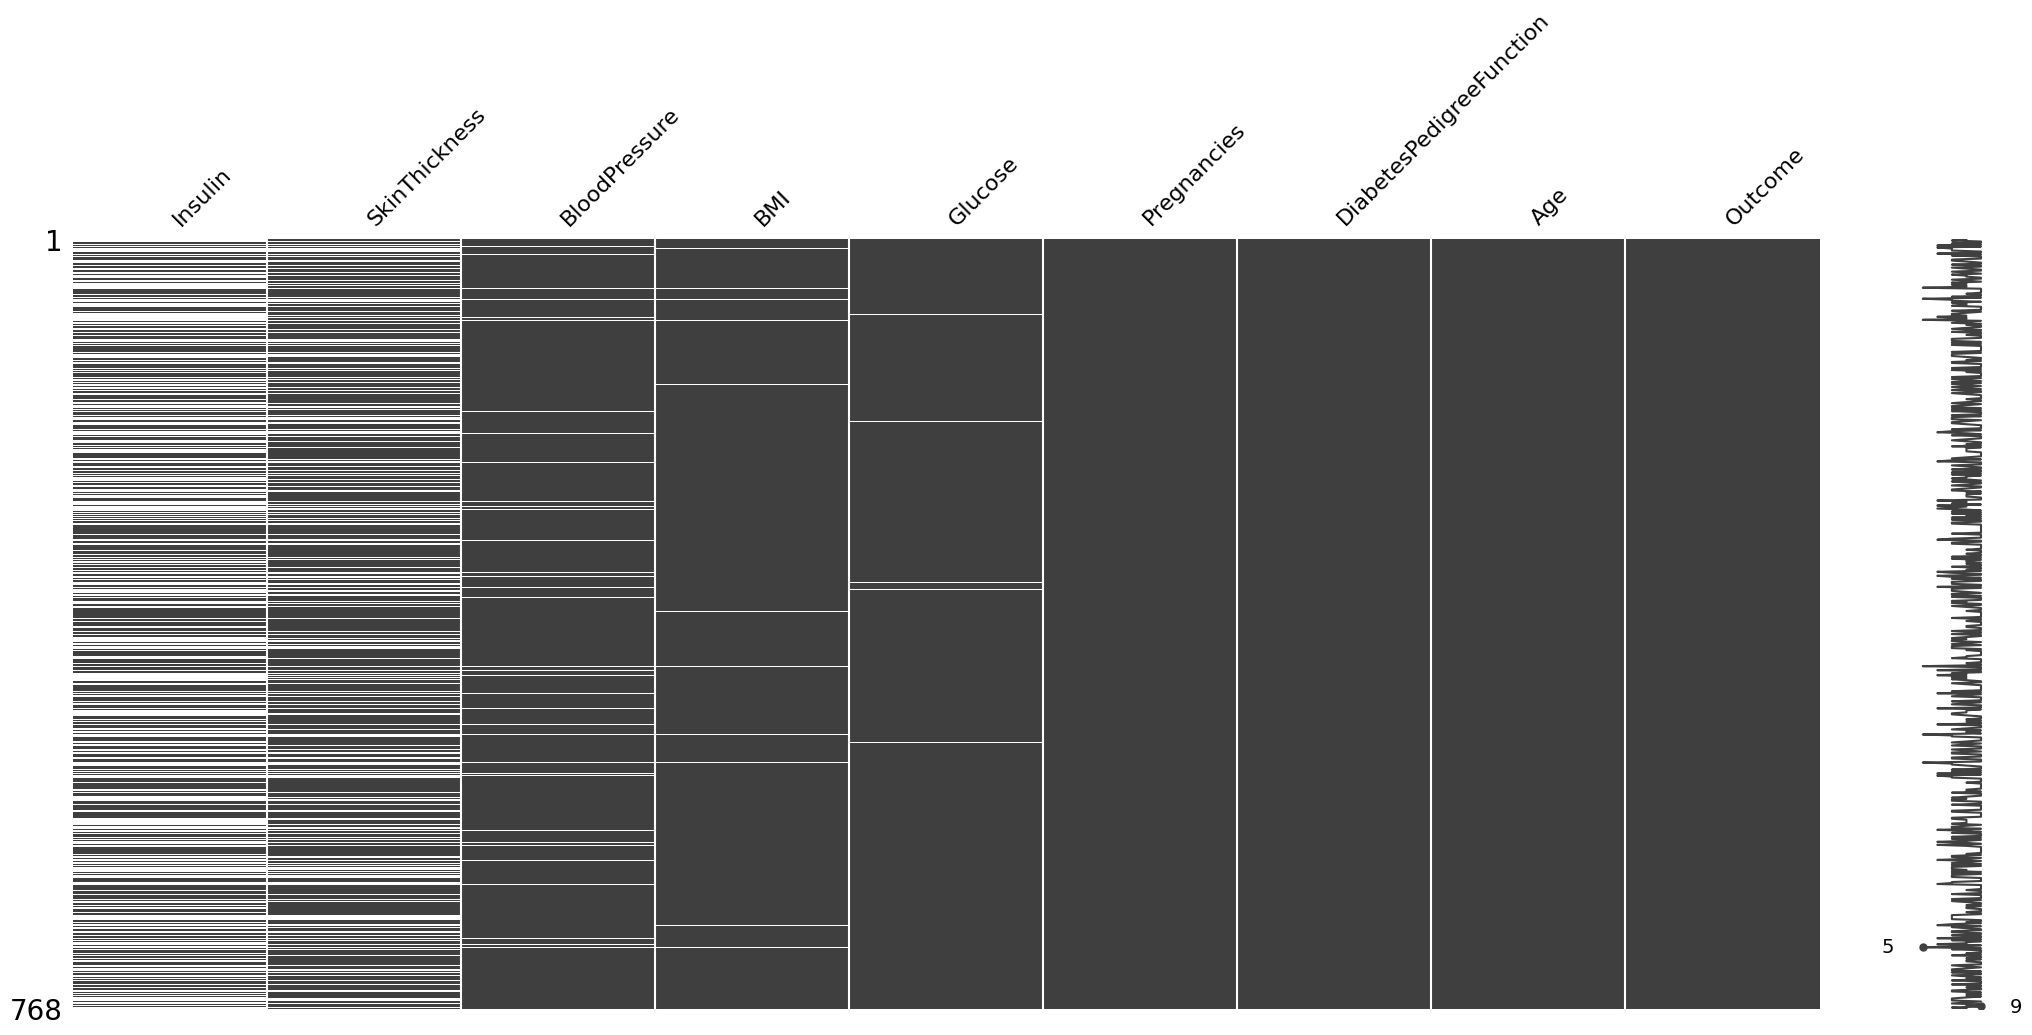

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

## MISSING AT RANDOM(MAR)

<Axes: >

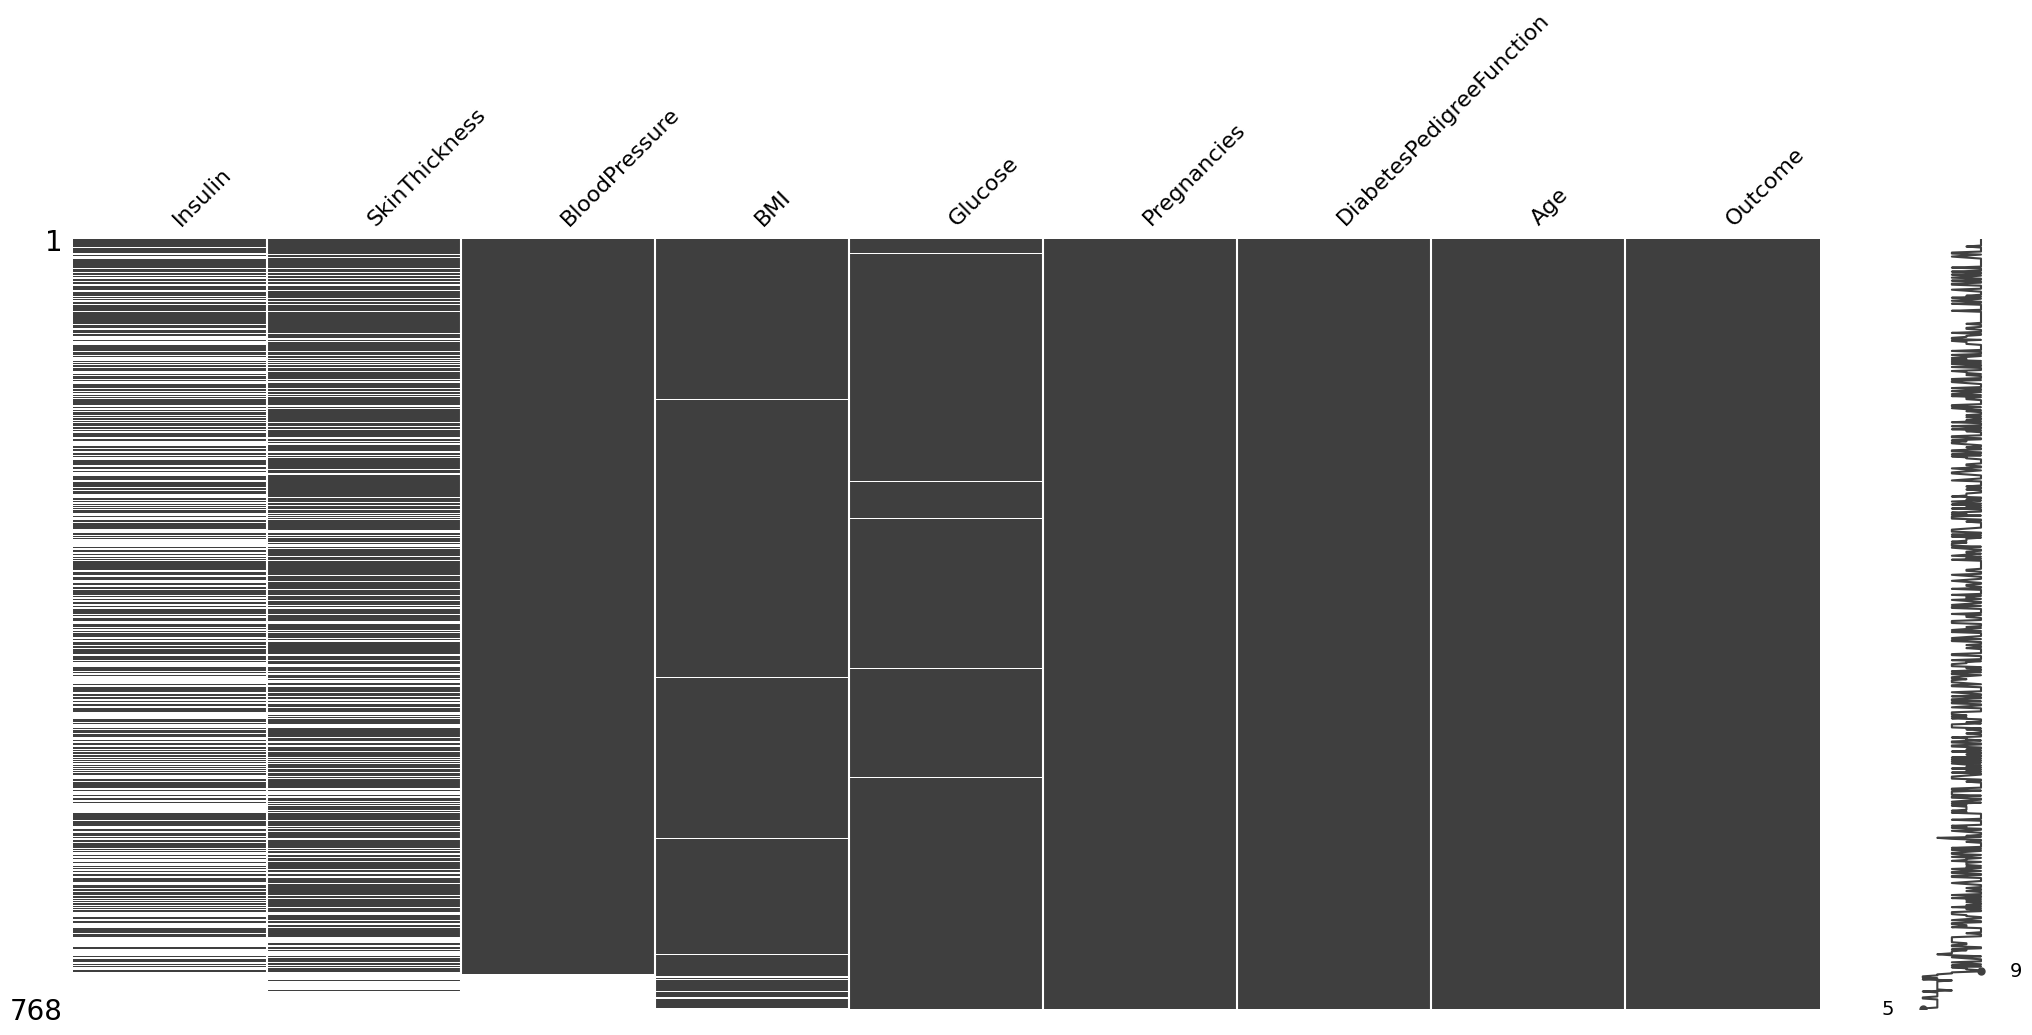

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='BloodPressure')
    .pipe(missingno.matrix)
)

## MISSING NOT AT RANDOM(MNAR)

<Axes: >

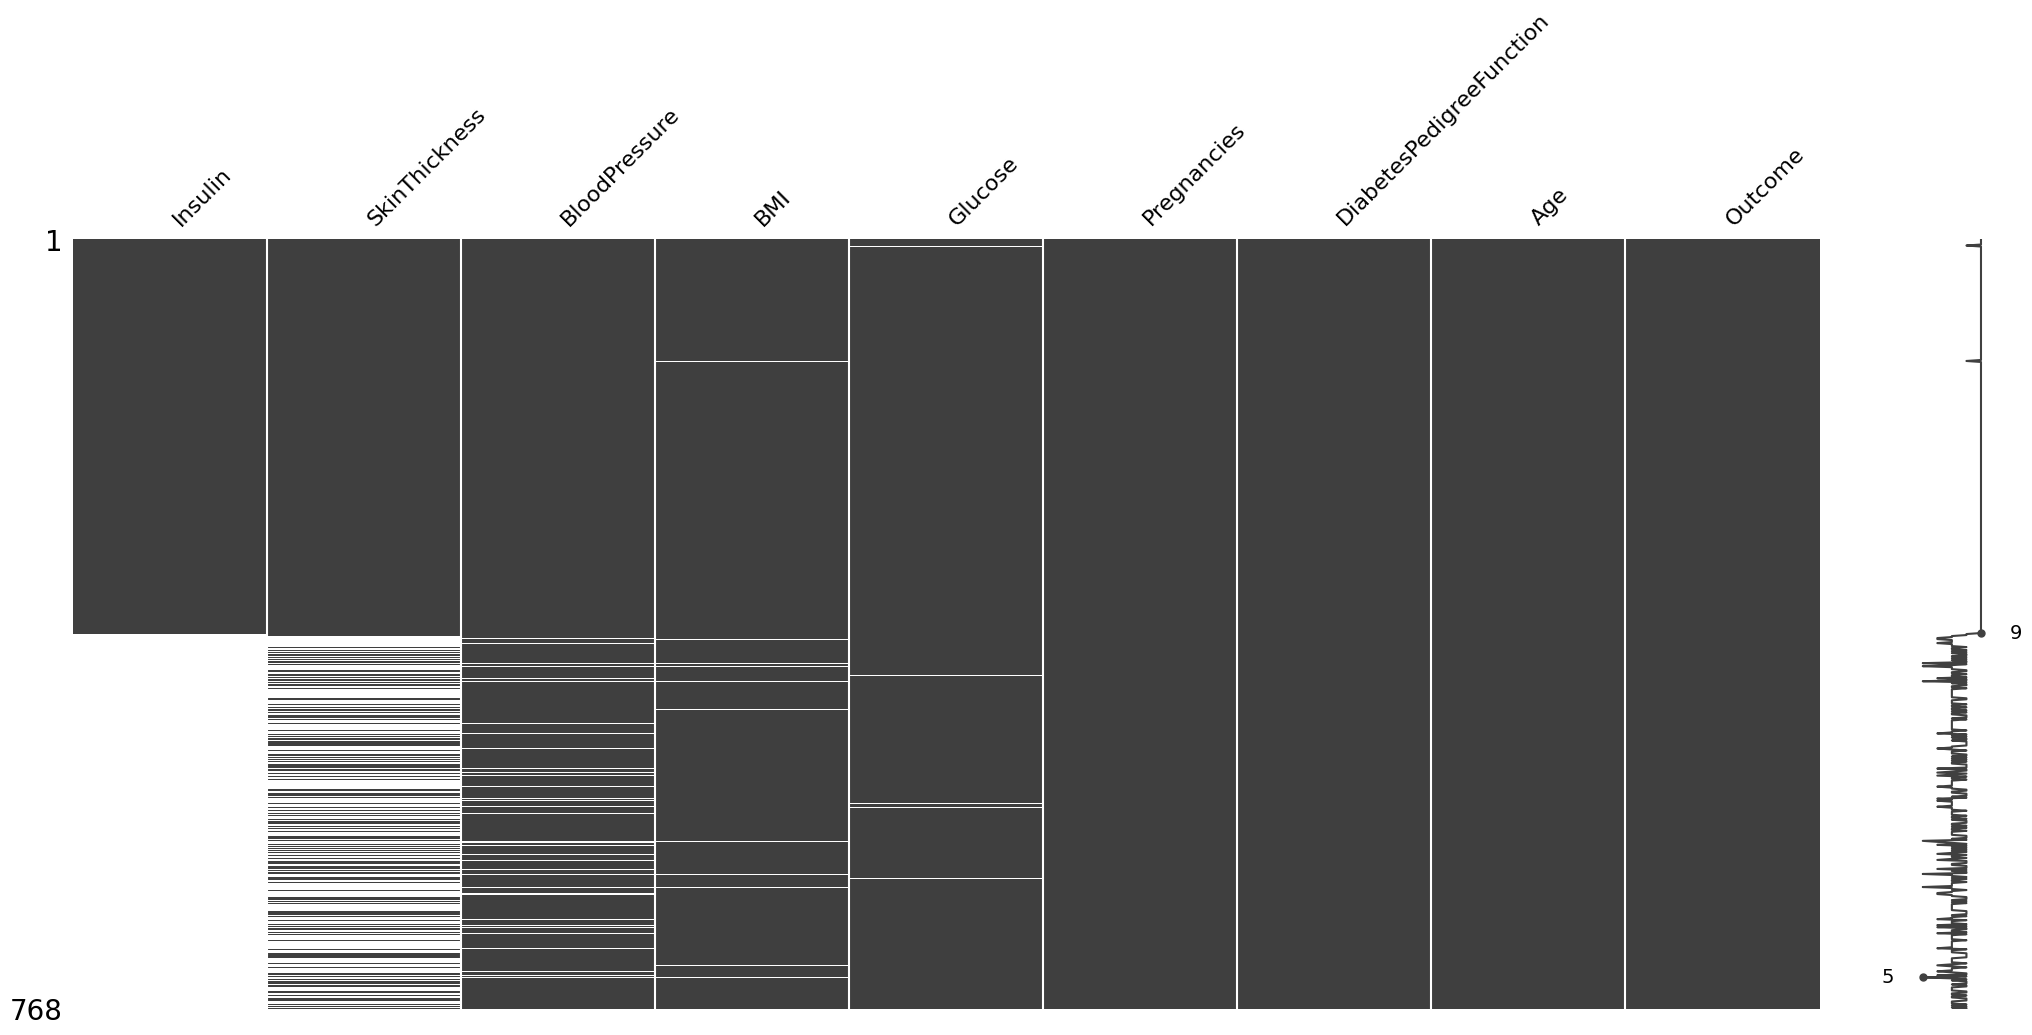

In [ ]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='Insulin')
    .pipe(missingno.matrix)
)

# METODOS DE IMPUTACIÓN

# IMPUTACIÓN POR MEDIDAS DE TENDENCIA CENTRAL(MEDIA, MEDIANA, MODA)

In [25]:
diabetes_df.Glucose.isna().sum()

5

In [21]:
sorted_df = diabetes_df.sort_values(
    by=['Glucose'],
    ascending=False
)
sorted_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
408,8,197.0,74.0,NaN,NaN,25.9,1.191,39,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1


### IMPUTACIÓN POR MEDIA

In [30]:
sorted_df['Glucose'].mean()

121.6867627785059

In [28]:
diabetes_glucose_df_mean = diabetes_df.copy()
diabetes_glucose_df_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [29]:
diabetes_glucose_df_mean['Glucose'] = diabetes_glucose_df_mean['Glucose'].fillna(diabetes_glucose_df_mean['Glucose'].mean())
sorted_glucose_df = diabetes_glucose_df_mean.sort_values(
    by=['Glucose'],
    ascending=False
)
sorted_glucose_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1
...,...,...,...,...,...,...,...,...,...
352,3,61.0,82.0,28.0,NaN,34.4,0.243,46,0
146,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
537,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0
680,2,56.0,56.0,28.0,45.0,24.2,0.332,22,0


In [31]:
diabetes_df.Glucose.isna().sum()

5

In [32]:
sorted_df['Glucose'].mean()

121.6867627785059

In [33]:
diabetes_glucose_df_mean['Glucose'].mean()

121.68676277850591

# IMPUTACIÓN POR MEDIANA

In [34]:
diabetes_glucose_df_median = diabetes_df.copy()
diabetes_glucose_df_median

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [35]:
diabetes_glucose_df_median['Glucose'] = diabetes_glucose_df_median['Glucose'].fillna(diabetes_glucose_df_median['Glucose'].median())
sorted_glucose_median_df = diabetes_glucose_df_mean.sort_values(
    by=['Glucose'],
    ascending=False
)
sorted_glucose_median_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1
...,...,...,...,...,...,...,...,...,...
352,3,61.0,82.0,28.0,NaN,34.4,0.243,46,0
146,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
537,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0
680,2,56.0,56.0,28.0,45.0,24.2,0.332,22,0


In [36]:
print(f" mediana original : {sorted_df['Glucose'].median()} | mediana sin nulos : {diabetes_glucose_df_median['Glucose'].median()}")

 mediana original : 117.0 | mediana sin nulos : 117.0


### IMPUTACIÓN POR MODA

In [37]:
diabetes_glucose_df_mode = diabetes_df.copy()
diabetes_glucose_df_mode

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [38]:
diabetes_glucose_df_mode['Glucose'] = diabetes_glucose_df_mode['Glucose'].fillna(diabetes_glucose_df_mode['Glucose'].median())
sorted_glucose_mode_df = diabetes_glucose_df_mode.sort_values(
    by=['Glucose'],
    ascending=False
)
sorted_glucose_mode_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1
...,...,...,...,...,...,...,...,...,...
352,3,61.0,82.0,28.0,NaN,34.4,0.243,46,0
146,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
537,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0
680,2,56.0,56.0,28.0,45.0,24.2,0.332,22,0


In [39]:
print(f" mediana original : {sorted_df['Glucose'].mode()} | mediana sin nulos : {diabetes_glucose_df_mode['Glucose'].mode()}")

 mediana original : 0     99.0
1    100.0
Name: Glucose, dtype: float64 | mediana sin nulos : 0     99.0
1    100.0
Name: Glucose, dtype: float64
